In [339]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import math as m
import matplotlib.pyplot as plt

# <h1>Data Preparation & Cleaning</h1>

### 1. load the file using pandas
### 2. take overview of the columns and data
### 3. fix any missing and wrong entries

In [ ]:
# read the csv file

df = pd.read_csv('./US_Accidents.csv')

In [3]:
# lets look at the head of the data

df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [8]:
# dataframe columns

df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [198]:
# look at the data types of the columns
df.dtypes

ID                               object
Severity                          int64
Start_Time               datetime64[ns]
End_Time                         object
Start_Lat                       float64
Start_Lng                       float64
End_Lat                         float64
End_Lng                         float64
Distance(mi)                    float64
Description                      object
Number                          float64
Street                           object
Side                             object
City                             object
County                           object
State                            object
Zipcode                          object
Country                          object
Timezone                         object
Airport_Code                     object
Weather_Timestamp                object
Temperature(F)                  float64
Wind_Chill(F)                   float64
Humidity(%)                     float64
Pressure(in)                    float64


In [10]:
# detailed info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [7]:
# view the statistics of the data

df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [17]:
# identify no of numeric columns

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = df.select_dtypes(include=numerics)
len(newdf.columns)

14

In [37]:
df['End_Lat'].isna().sum()

0

In [38]:
# count missing values per column/ percentage of missing values

missing_percentages = df.isna().sum().sort_values(ascending=False)/len(df)

<AxesSubplot:>

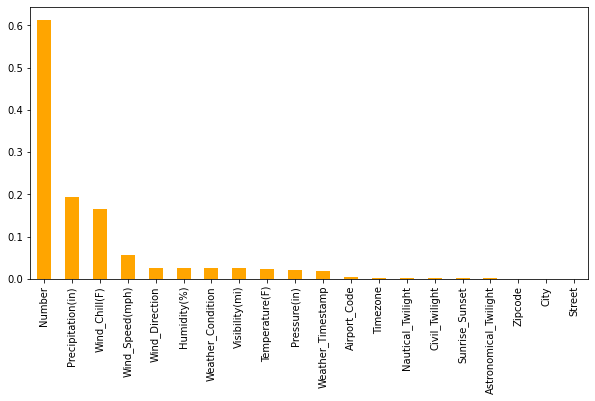

In [347]:
# plot bar chart of missing percentages greater than zeo

missing_percentages[missing_percentages>0].plot(kind='bar', color='orange', figsize=(10,5))

In [56]:
# drop column which has more than 50 percent data is missing

df2 = df.drop('Number',1)

C:\Users\HHC\AppData\Local\Temp/ipykernel_10704/4278387366.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2 = df.drop('Number',1)


<h1><i>Exploratory Analysis and Visualization</i></h1>

## Analysize these 5 columns

### 1. City
### 2. Start time
### 3. start lat, start lng
### 4. Temperature
### 5. Weather Condition

In [60]:
df2.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'Side',
       'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

## City

In [69]:
df2[['City', 'Start_Time','Start_Lat','Start_Lng','Temperature(F)','Weather_Condition']]

,City,Start_Time,Start_Lat,Start_Lng,Temperature(F),Weather_Condition
0,Dublin,2016-02-08 00:37:08,40.108910,-83.092860,42.1,Light Rain
1,Dayton,2016-02-08 05:56:20,39.865420,-84.062800,36.9,Light Rain
2,Cincinnati,2016-02-08 06:15:39,39.102660,-84.524680,36.0,Overcast
3,Akron,2016-02-08 06:51:45,41.062130,-81.537840,39.0,Overcast
4,Cincinnati,2016-02-08 07:53:43,39.172393,-84.492792,37.0,Light Rain
...,...,...,...,...,...,...
2845337,Riverside,2019-08-23 18:03:25,34.002480,-117.379360,86.0,Fair
2845338,San Diego,2019-08-23 19:11:30,32.766960,-117.148060,70.0,Fair
2845339,Orange,2019-08-23 19:00:21,33.775450,-117.847790,73.0,Partly Cloudy
2845340,Culver City,2019-08-23 19:00:21,33.992460,-118.403020,71.0,Fair


In [83]:
# unique cities

df2.City.unique()

array(['Dublin', 'Dayton', 'Cincinnati', ..., 'Clarksdale', 'Bridgeboro',
       'American Fork-Pleasant Grove'], dtype=object)

In [90]:
# top 5 cities with most number of accidents

df2['City'].value_counts()[:5]

Miami          106966
Los Angeles     68956
Orlando         54691
Dallas          41979
Houston         39448
Name: City, dtype: int64

In [89]:
df2[['City','Description']][df2.City == 'New York']

,City,Description
31580,New York,Between Amsterdam Ave/Harlem River Dr and Huds...
31625,New York,At 79th St - Accident.
31710,New York,Between 65th St/66th St and 34th St - Accident.
31901,New York,At 42nd St/Exit 9 - Accident.
32073,New York,Between Centre St and Cadman Plaza - Accident.
...,...,...
2843385,New York,At I-495/Midtown Tunnel/Exit 8 - Accident. Lan...
2843916,New York,Between RT-9A/Henry Hudson Pky and Hudson Ter/...
2844444,New York,At Beginning of Bridge - Accident. Left lane b...
2844464,New York,At 49th St/Exit 10 - Accident. Left lane blocked.


<AxesSubplot:>

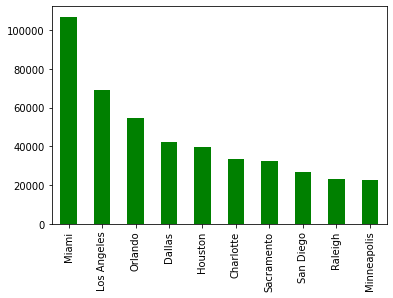

In [93]:
# bar chart of 10 ten cities which has recorded most no of accidents

df2['City'].value_counts()[:10].plot(kind='bar',color='g')

c:\users\hhc\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

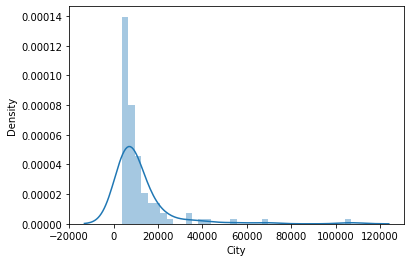

In [104]:
# distribution of accidents recordred in cities in seaborn distribution plot

sns.distplot(df2.City.value_counts()[:100])

In [109]:
cities_by_accident = df2.City.value_counts()

In [110]:
cities_by_accident

Miami                           106966
Los Angeles                      68956
Orlando                          54691
Dallas                           41979
Houston                          39448
                                 ...  
Ridgedale                            1
Sekiu                                1
Wooldridge                           1
Bullock                              1
American Fork-Pleasant Grove         1
Name: City, Length: 11681, dtype: int64

In [112]:
# separate cities by accident to Highest Accident Cities and Lower Accident Cities

highest_accident_cities = df2.City.value_counts()[df2.City.value_counts()>1000]
Lower_accident_cities = df2.City.value_counts()[df2.City.value_counts()< 1000]

In [132]:
len(Lower_accident_cities)/len(df2.City.value_counts())

0.957537882030648

In [131]:
len(highest_accident_cities)/len(df2.City.value_counts())

0.042290899751733585

c:\users\hhc\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

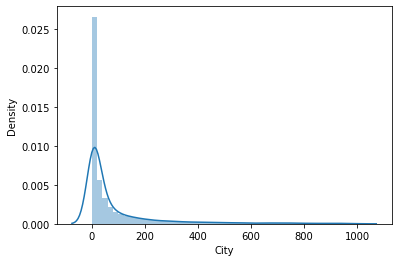

In [136]:
# distribution of countries with less than 1000 accidents recorded
sns.distplot(Lower_accident_cities)

<AxesSubplot:xlabel='City', ylabel='Count'>

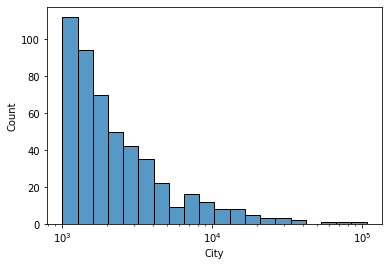

In [135]:
sns.histplot(highest_accident_cities, log_scale=True)

In [137]:
# countries which recorded which only recorded 1 accident

df2.City.value_counts()[df2.City.value_counts()==1]

Carney                          1
Waverly Hall                    1
Center Sandwich                 1
Glen Flora                      1
Sulphur Springs                 1
                               ..
Ridgedale                       1
Sekiu                           1
Wooldridge                      1
Bullock                         1
American Fork-Pleasant Grove    1
Name: City, Length: 1110, dtype: int64

<i><b>there is something wrong with this, about 1110 cities recorded just 1 accident, How ? </a></i>

## Summary & Insights
#### 1. there are 1110 cities which have recorded just 1 accident.?
#### 2. only 5 % countries which have recorded more than 1000 accidents,

### Start Time

In [165]:
df2.Start_Time = pd.to_datetime(df2.Start_Time)

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

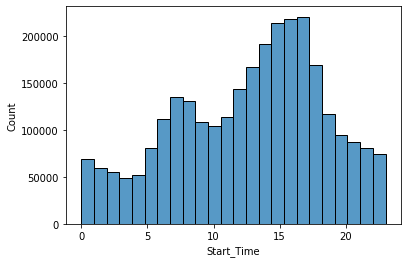

In [161]:
# histogram of accidents recorded every hour
# we can see most accidents happened during 6-9 in the morning and 3-7 in the evening
sns.histplot(df.Start_Time.dt.hour, bins=24)

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

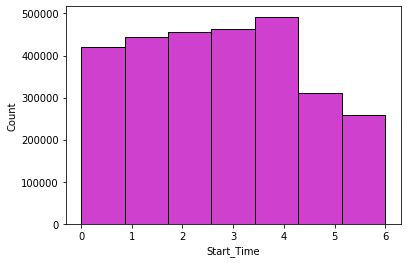

In [168]:
# histogram of accidents recorded day wise (0-monday, 6-Sunday)

sns.histplot(df2['Start_Time'].dt.dayofweek, bins=7, color='m')

### is distribution of accidents by hour is same on weekends campared to working day?

In [179]:
# accidents happened by hour on sunday

accidents_on_sunday = df2.Start_Time.dt.hour[df2.Start_Time.dt.dayofweek == 6]

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

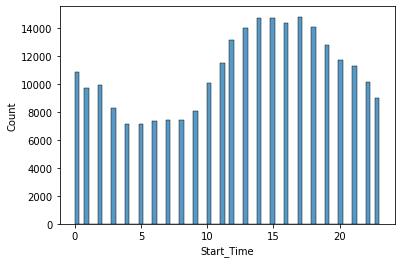

In [180]:
sns.histplot(accidents_on_sunday)

In [188]:
# accidents happened by hour on monday

accidents_on_monday = df2.Start_Time.dt.hour[df2.Start_Time.dt.dayofweek == 0]

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

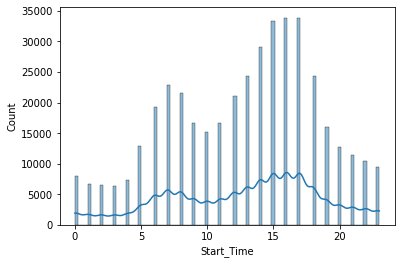

In [190]:
sns.histplot(accidents_on_monday, kde=True)

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

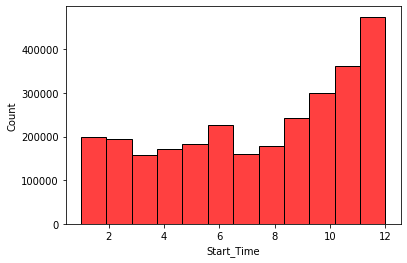

In [222]:
# accidents happened by months
current_palette = sns.color_palette()
sns.histplot(df2['Start_Time'].dt.month, bins=12, color='red')

## Summary & Insights

#### less accidents happened on weekends as compared to working days
#### weekends distribution of accidents by hour is different from working days, its more like a normal distrubtion i.e. bell curve

### Weather Condition

In [206]:
# different weather conditions 

len(df2.Weather_Condition.unique())

128

In [363]:
# total accidents happened in different weather conditions

df2.Weather_Condition.value_counts()[:20]

Fair                       1107194
Mostly Cloudy               363959
Cloudy                      348767
Partly Cloudy               249939
Clear                       173823
Light Rain                  128403
Overcast                     84882
Scattered Clouds             45132
Light Snow                   43752
Fog                          41226
Haze                         36354
Rain                         31044
Fair / Windy                 15195
Heavy Rain                   11824
Smoke                         7200
Light Drizzle                 7041
Thunder in the Vicinity       6944
Cloudy / Windy                6839
T-Storm                       6546
Mostly Cloudy / Windy         6297
Name: Weather_Condition, dtype: int64

c:\users\hhc\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weather_Condition', ylabel='Density'>

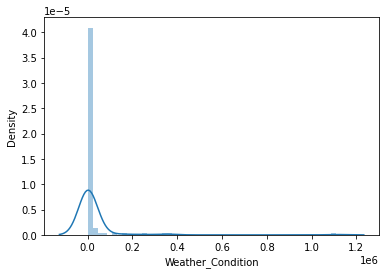

In [215]:
sns.distplot(df2.Weather_Condition.value_counts())

### Temperature

In [354]:
df2['Temperature(F)']

0          42
1          36
2          36
3          39
4          37
           ..
2845337    86
2845338    70
2845339    73
2845340    71
2845341    79
Name: Temperature(F), Length: 2845342, dtype: int64

In [405]:
df2['Temperature(F)'].describe().apply(lambda x: format(x, 'f'))


count    2776068.000000
mean          61.793556
std           18.622629
min          -89.000000
25%           50.000000
50%           64.000000
75%           76.000000
max          196.000000
Name: Temperature(F), dtype: object

In [328]:
# error because Temperature column contain NaN values let's check

In [406]:
df2['Temperature(F)'].isna().sum()

69274

In [407]:
# fill the Nan values with 0
df2['Temperature(F)']= df2['Temperature(F)'].fillna(0)

In [408]:
# parse float to int

df2['Temperature(F)']= df2['Temperature(F)'].astype('int64')

### Note

#### so the maximum Temperature ever recorded in fahrenheit is 134 F and lowest temperature ever recorded is -128.6 F
#### lets check how many temperature counts are greater than 134 F

In [427]:
df2['Temperature(F)'][df2['Temperature(F)'] < 134].count()

2845334

In [374]:
# there are just 8 entries which are greater than 134. so can drop those rows

In [425]:
df2 = df2[df2['Temperature(F)'] < 135]

In [430]:
# wrong temperatures i.e. greater than 134 has been removed

df2['Temperature(F)'].sort_values()

2235802    -89
2235797    -89
2716825    -77
1998209    -58
2008428    -50
          ... 
1551546    120
1618641    120
1627780    120
17518      127
24105      129
Name: Temperature(F), Length: 2845334, dtype: int64

<AxesSubplot:xlabel='Temperature(F)', ylabel='Count'>

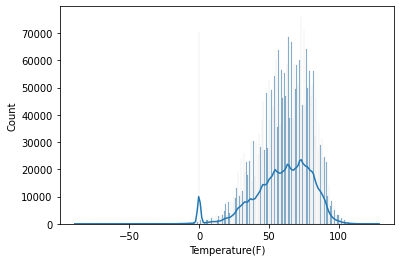

In [432]:
# lets draw histrogram to see the disribution

sns.histplot(df2['Temperature(F)'], kde=True)

##### it looks like a normal distribution

### Start Latitude & Start Longitute

In [326]:
df2['Start_Lng']

0          -83.092860
1          -84.062800
2          -84.524680
3          -81.537840
4          -84.492792
              ...    
2845337   -117.379360
2845338   -117.148060
2845339   -117.847790
2845340   -118.403020
2845341   -117.230920
Name: Start_Lng, Length: 2845342, dtype: float64

In [230]:
# lets view some stats of these columns

#df2[['Start_Lng', 'Start_Lat']].describe()
df2[['Start_Lng', 'Start_Lat']].describe().apply(lambda s: s.apply('{0:.5f}'.format))

,Start_Lng,Start_Lat
count,2845342.00000,2845342.00000
mean,-97.11463,36.24520
std,18.31782,5.36380
min,-124.54807,24.56603
25%,-118.03311,33.44517
50%,-92.41808,36.09861
75%,-80.37243,40.16024
max,-67.11317,49.00058


<AxesSubplot:ylabel='Count'>

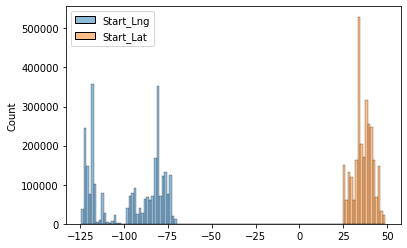

In [228]:
# histogram of start_lat, start_lng

sns.histplot(df2[['Start_Lng', 'Start_Lat']])

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

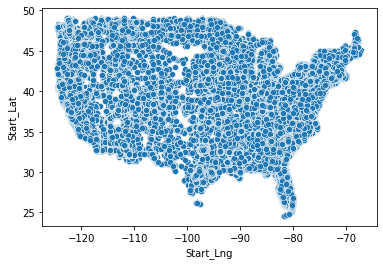

In [232]:
sns.scatterplot(y=df2.Start_Lat, x=df2.Start_Lng)

In [464]:
import folium
map = folium.Map()
map

In [251]:
# put a piont on a map

df2[['Start_Lng', 'Start_Lat']].iloc[1]

Start_Lng   -84.06280
Start_Lat    39.86542
Name: 1, dtype: float64

In [288]:
location = folium.Map(location=[39.86542,-84.06280], zoom_start=18, control_scale=True, tiles='Stamen Water Color')

### HeatMap

In [463]:
from folium import plugins
from folium.plugins import HeatMap

In [462]:
21+3

24

In [316]:
# 01 % random sample of dataframe

df_sample2 = df2.sample(int(0.001*len(df2)))

In [315]:
df_sample2.shape

(2845, 46)

In [465]:
HeatMap(list(zip(df_sample2.Start_Lat,df_sample2.Start_Lng)), ).add_to(map)
map

In [273]:
list(zip(df2.Start_Lat.iloc[:20], df2.Start_Lng.iloc[:20]))

[(40.10891, -83.09286),
 (39.86542, -84.0628),
 (39.10266, -84.52468),
 (41.06213, -81.53784),
 (39.172393, -84.49279200000002),
 (39.06324, -84.03243),
 (39.77565, -84.18603),
 (41.37531, -81.82016999999998),
 (40.702247, -84.075887),
 (40.10931, -82.96849),
 (39.19288, -84.47723),
 (39.13877, -84.53394),
 (41.4739, -81.704233),
 (39.582242, -83.677814),
 (40.151785, -81.312635),
 (40.151747, -81.312682),
 (39.97241, -82.84695),
 (39.9838, -82.85656999999998),
 (40.02664, -82.9944),
 (41.679361, -83.573037)]

<h1>Ask & Answer Questions</h1>

### Are there more accidents in warmer or in cold areas?

### Which State has highest no of accidents?

In [433]:
df2.City.value_counts()

Miami                           106966
Los Angeles                      68956
Orlando                          54691
Dallas                           41979
Houston                          39448
                                 ...  
Ridgedale                            1
Sekiu                                1
Wooldridge                           1
Bullock                              1
American Fork-Pleasant Grove         1
Name: City, Length: 11681, dtype: int64

In [434]:
# Miami has recorded most no of accidents

### Why accident count in NYC is lower as it is the most populated city of USA?

### What time of day accidents are more frequent in?

In [437]:
accident_hours = df.Start_Time.dt.hour.value_counts()
accident_hours

17    220358
16    218385
15    214264
14    191480
18    168982
13    166473
12    143715
7     135191
8     130879
19    116911
11    113271
6     111160
9     108779
10    103926
20     94682
21     87078
22     81188
5      80303
23     74243
0      68800
1      59370
2      55443
4      51805
3      48656
Name: Start_Time, dtype: int64

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

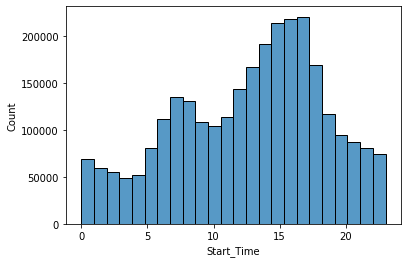

In [439]:
# 17 i.e. 5 PM is the time when most of the accidents heppened, also verified by this histogram

sns.histplot(df.Start_Time.dt.hour, bins=24)

### which days of week has most accidents?

In [440]:
accident_by_day = df2['Start_Time'].dt.dayofweek.value_counts()
accident_by_day

4    492074
3    463471
2    455037
1    443967
0    419820
5    311691
6    259274
Name: Start_Time, dtype: int64

##### 4 i.e. Friday is the day when most number of accidents happened 
##### 6 i.e. sunday is the day least no of acidents happened (may be because of the holiday)